### *k*-Means Clustering

Clustering is an unsupervised learning method for grouping data into clusters to detect similarities. *k*-Means is a popular method for performing clustering and is implemented in Scikit's [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) class.

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

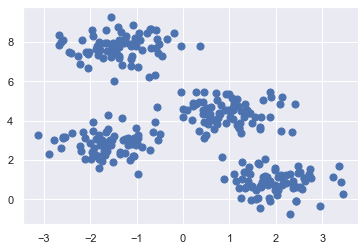

In [4]:
# generate some data points loosely grouped into four clusters:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
x = X[:, 0]
y = X[:, 1]
plt.scatter(x, y, s=50)


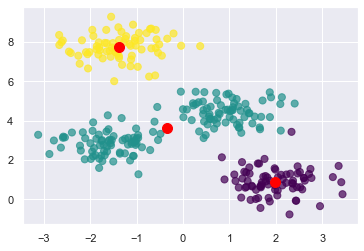

In [5]:
# group the data points into 3 clusters:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
predicted_cluster_indexes = kmeans.predict(X)

plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

How do you determine the "right" number of clusters? One way to do it is with the elbow method, which plots "inertias" (the sum of the squared distances of the data points to the closest cluster center) obtained from `KMeans.inertia_` as a function of cluster counts:

Text(0, 0.5, 'Inertia')

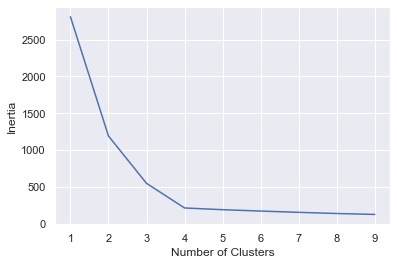

In [7]:
inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

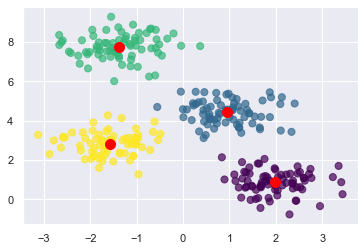

In [ ]:
# group the data points into 4 clusters:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
predicted_cluster_indexes = kmeans.predict(X)

plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

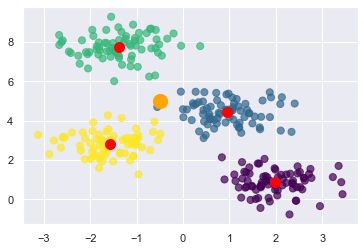

In [8]:
# add a new datapoint (-0.5, 5):
point = np.array([[-0.5, 5]])
px = point[:, 0]
py = point[:, 1]

plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)
plt.scatter(px, py, c='orange', s=200)

In [10]:
# predict the cluster the new point belongs to:
cluster = kmeans.predict(point)[0]
print(cluster)

4


### k-Means Clustering with the Iris Dataset

Let's see how k-Means clustering could be used to analyze the classic Iris dataset.

In [14]:
from sklearn import datasets

# load iris dataset, assign its data to variable X:
iris = datasets.load_iris()
X = iris.data

# create k-means object:
kmeans = KMeans(n_clusters=3, random_state=0) #, n_jobs=-1)

# train model:
model = kmeans.fit(X)

# print prediction classes:
print("labels: ", model.labels_)

# print cluster centers:
print("centers: ", model.cluster_centers_)

labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
centers:  [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


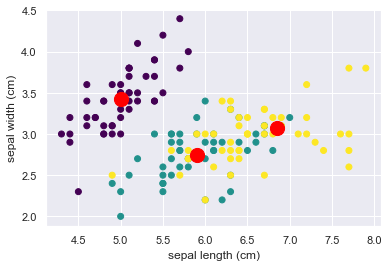

In [16]:
# plot the data points:
scatter = plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap='viridis')

# add plot labels:
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# plot the cluster centers:
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], color='red', s=200)
plt.show()

### k-Means with Hand-written Digits

To demonstrate these principles on a more interesting problem, let's consider one piece of the optical character recognition problem: the identification of hand-written digits.

In [17]:
from sklearn.datasets import load_digits

# load digits dataset and print its shape:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [18]:
# create k-Means object with 10 clusters (digits 0 - 9)
kmeans = KMeans(n_clusters=10, random_state=0)

clusters = kmeans.fit_predict(digits.data)
print(kmeans.cluster_centers_.shape)

(10, 64)


The result is 10 clusters in 64 dimensions. Notice that the cluster centers themselves are 64-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster. 

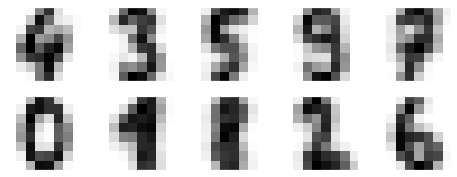

In [19]:
# preview clusters as 8x8 images:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [21]:
from scipy.stats import mode

# create labels for the clusters:
labels = np.zeros_like(clusters)

# match each learned cluster label with the true labels found in them:
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# compute accuracy score:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

Text(89.18, 0.5, 'predicted label')

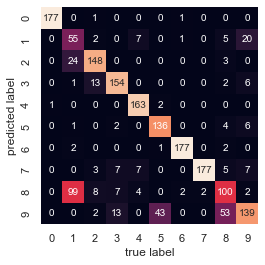

In [23]:
# create and plot the confusion matrix:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

As we might expect from the cluster centers we visualized before, the main point of confusion is between the 8's and 1's. Still, this shows that using k-means, we can essentially build a digit classifier that's about 80% accurate, without reference to any known labels.